In [1]:
import os
os.getcwd()


'c:\\Users\\Safi\\OneDrive\\Documents\\GitHub\\python-data-automation\\data'

In [2]:
import pandas as pd

df = pd.read_csv("../data/sales_data.csv")
df.head()


,Date,Product,Units_Sold,Unit_Price,Revenue,Region
0,2024-01-01,Phone,120,650,78000,North
1,2024-01-02,Tablet,80,450,36000,East
2,2024-01-03,Laptop,45,1200,54000,West
3,2024-01-04,Phone,100,650,65000,South
4,2024-01-05,Tablet,90,450,40500,North


In [3]:
# Check basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        10 non-null     object
 1   Product     10 non-null     object
 2   Units_Sold  10 non-null     int64 
 3   Unit_Price  10 non-null     int64 
 4   Revenue     10 non-null     int64 
 5   Region      10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [4]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

df.dtypes


Date          datetime64[ns]
Product               object
Units_Sold             int64
Unit_Price             int64
Revenue                int64
Region                object
dtype: object

In [5]:
# Create new calculated fields
df["Profit"] = df["Revenue"] * 0.25   # pretend 25% profit margin
df["Revenue_per_Unit"] = df["Revenue"] / df["Units_Sold"]

df.head()


,Date,Product,Units_Sold,Unit_Price,Revenue,Region,Profit,Revenue_per_Unit
0,2024-01-01,Phone,120,650,78000,North,19500.0,650.0
1,2024-02-01,Tablet,80,450,36000,East,9000.0,450.0
2,2024-03-01,Laptop,45,1200,54000,West,13500.0,1200.0
3,2024-04-01,Phone,100,650,65000,South,16250.0,650.0
4,2024-05-01,Tablet,90,450,40500,North,10125.0,450.0


In [6]:
# Check for missing values
df.isnull().sum()


Date                0
Product             0
Units_Sold          0
Unit_Price          0
Revenue             0
Region              0
Profit              0
Revenue_per_Unit    0
dtype: int64

In [7]:
# Summary statistics
df.describe(include="all")


,Date,Product,Units_Sold,Unit_Price,Revenue,Region,Profit,Revenue_per_Unit
count,10,10,10.00000,10.000000,10.00000,10,10.000000,10.000000
unique,NaN,3,NaN,NaN,NaN,4,NaN,NaN
top,NaN,Phone,NaN,NaN,NaN,North,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,3,NaN,NaN
mean,2024-05-16 19:12:00,NaN,86.50000,755.000000,60125.00000,NaN,15031.250000,755.000000
min,2024-01-01 00:00:00,NaN,45.00000,450.000000,33750.00000,NaN,8437.500000,450.000000
25%,2024-03-08 18:00:00,NaN,63.75000,500.000000,43875.00000,NaN,10968.750000,500.000000
50%,2024-05-16 12:00:00,NaN,85.00000,650.000000,65500.00000,NaN,16375.000000,650.000000
75%,2024-07-24 06:00:00,NaN,107.50000,1062.500000,71875.00000,NaN,17968.750000,1062.500000
max,2024-10-01 00:00:00,NaN,130.00000,1200.000000,84500.00000,NaN,21125.000000,1200.000000


In [8]:
# Revenue by product
revenue_by_product = df.groupby("Product")["Revenue"].sum()
revenue_by_product


Product
Laptop    192000
Phone     299000
Tablet    110250
Name: Revenue, dtype: int64

In [9]:
# Revenue by region
revenue_by_region = df.groupby("Region")["Revenue"].sum()
revenue_by_region


Region
East     192500
North    184500
South     98750
West     125500
Name: Revenue, dtype: int64

In [10]:
# Best-selling date (units sold)
df.loc[df["Units_Sold"].idxmax()]


Date                2024-10-01 00:00:00
Product                           Phone
Units_Sold                          130
Unit_Price                          650
Revenue                           84500
Region                             East
Profit                          21125.0
Revenue_per_Unit                  650.0
Name: 9, dtype: object

In [12]:
import matplotlib.pyplot as plt


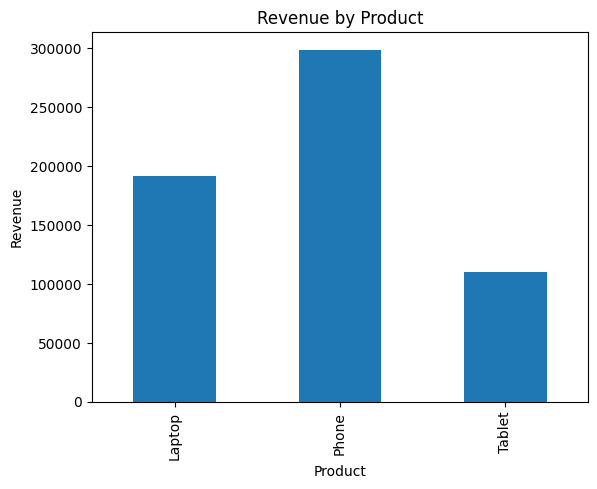

In [13]:
import matplotlib.pyplot as plt

# Revenue by product
revenue_by_product.plot(kind="bar")
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()


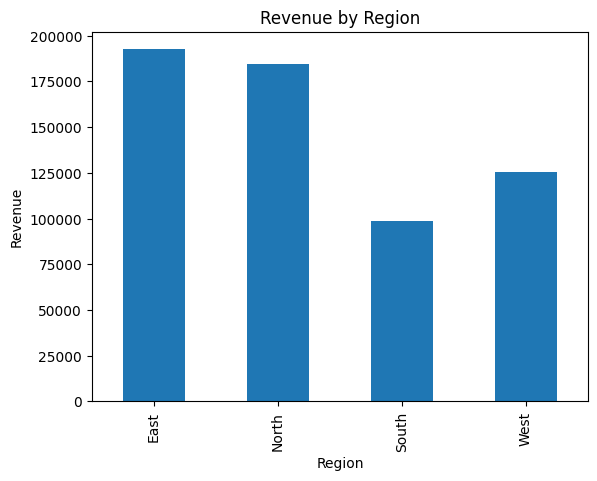

In [14]:
# Revenue by Region
revenue_by_region.plot(kind="bar")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()


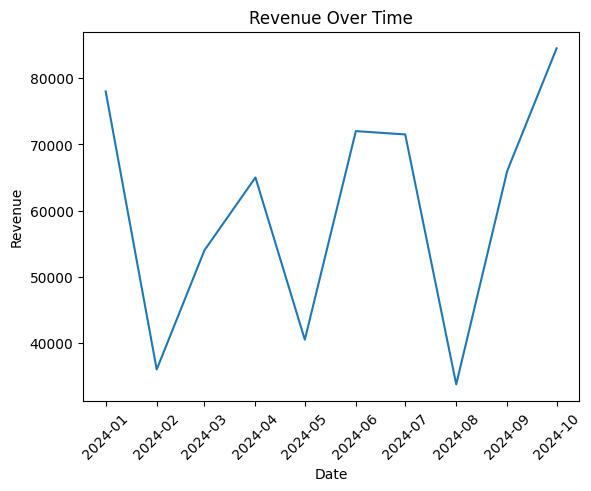

In [15]:
plt.plot(df["Date"], df["Revenue"])
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


In [16]:
df.to_csv("../data/sales_data_cleaned.csv", index=False)
